### Read in 2015 Crime Data

Using the provided link to the dataset, I filtered the full Chicago Crimes dataset for those occuring in 2015 read the CSV file into my notebook.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

crimes = pd.read_csv('Crimes_-_2015.csv')

### EDA

In [6]:
crimes.shape

(263776, 22)

The 2015 crimes dataset contains just under 264,000 rows (with each row representing one recorded crime), and 22 features describing the crime.

In [7]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263776 entries, 0 to 263775
Data columns (total 22 columns):
ID                      263776 non-null int64
Case Number             263776 non-null object
Date                    263776 non-null object
Block                   263776 non-null object
IUCR                    263776 non-null object
Primary Type            263776 non-null object
Description             263776 non-null object
Location Description    263432 non-null object
Arrest                  263776 non-null bool
Domestic                263776 non-null bool
Beat                    263776 non-null int64
District                263776 non-null int64
Ward                    263774 non-null float64
Community Area          263776 non-null int64
FBI Code                263776 non-null object
X Coordinate            257889 non-null float64
Y Coordinate            257889 non-null float64
Year                    263776 non-null int64
Updated On              263776 non-null object
La

Let's convert the index from Range to DateTime.

In [8]:
crimes.Date = pd.to_datetime(crimes.Date)
crimes.set_index('Date', inplace=True)

In [9]:
crimes.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 19:44:00,10000092,HY189866,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,...,28.0,25,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
2015-03-18 23:00:00,10000094,HY190059,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,...,15.0,67,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2015-03-18 22:45:00,10000095,HY190052,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,...,4.0,39,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
2015-03-18 22:30:00,10000096,HY190054,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,225,...,3.0,40,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
2015-03-18 21:00:00,10000097,HY189976,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,...,28.0,25,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [10]:
crimes.isnull().sum()

ID                         0
Case Number                0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     344
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       2
Community Area             0
FBI Code                   0
X Coordinate            5887
Y Coordinate            5887
Year                       0
Updated On                 0
Latitude                5887
Longitude               5887
Location                5887
dtype: int64

In [11]:
null_location = crimes.loc[:, 'Location'].isnull()
crimes.loc[null_location, 'Primary Type'].value_counts()

NARCOTICS                           2261
DECEPTIVE PRACTICE                  1779
THEFT                                635
OTHER OFFENSE                        270
OFFENSE INVOLVING CHILDREN           254
SEX OFFENSE                          123
CRIM SEXUAL ASSAULT                  116
BATTERY                               92
CRIMINAL DAMAGE                       85
BURGLARY                              80
MOTOR VEHICLE THEFT                   64
ASSAULT                               51
WEAPONS VIOLATION                     29
CRIMINAL TRESPASS                     10
PUBLIC PEACE VIOLATION                 8
STALKING                               7
INTIMIDATION                           6
ROBBERY                                5
OBSCENITY                              4
NON-CRIMINAL                           3
INTERFERENCE WITH PUBLIC OFFICER       3
KIDNAPPING                             1
LIQUOR LAW VIOLATION                   1
Name: Primary Type, dtype: int64

Because Location is a coordinate pair, it seems more likely that the null values for Location are due to data mis-handling, or that location was simply not recorded for these crimes, rather than the missingness being correlated in some way with the location itself (ie. crimes from certain locations more likely to not have location recorded).

In [12]:
# incident count by month 
monthly_count = crimes.groupby(pd.Grouper(freq='M'))['ID'].agg(['count'])
monthly_count

,count
Date,
2015-01-31,20805
2015-02-28,16334
2015-03-31,21622
2015-04-30,21667
2015-05-31,23627
2015-06-30,23115
2015-07-31,24163
2015-08-31,24744
2015-09-30,23051


In [13]:
monthly_df = pd.DataFrame({'# of Recorded Incidents': [20805, 16334, 21622, 21667, 23627, 23115, 24163, 24744, 23051, 23022, 20535, 21091],
                           'Month': ['January 2015', 'February 2015', 'March 2015', 'April 2015', 'May 2015', 'June 2015', 'July 2015', 'August 2015', 'September 2015', 'October 2015', 'November 2015', 'December 2015']})
monthly_df

,# of Recorded Incidents,Month
0,20805,January 2015
1,16334,February 2015
2,21622,March 2015
3,21667,April 2015
4,23627,May 2015
5,23115,June 2015
6,24163,July 2015
7,24744,August 2015
8,23051,September 2015
9,23022,October 2015


In [14]:
monthly_df.Month = pd.to_datetime(monthly_df.Month)
monthly_df.set_index('Month', inplace=True)

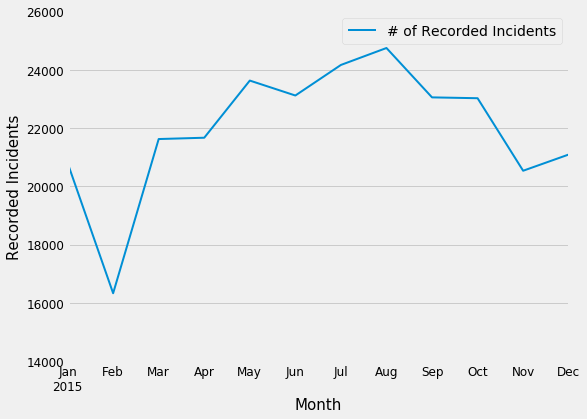

In [15]:
monthly_df.plot(figsize=(8,6), linewidth=2, fontsize=12)
plt.ylim(14000, 26000)
plt.xlabel('Month', fontsize=15);
plt.ylabel('Recorded Incidents', fontsize=15);

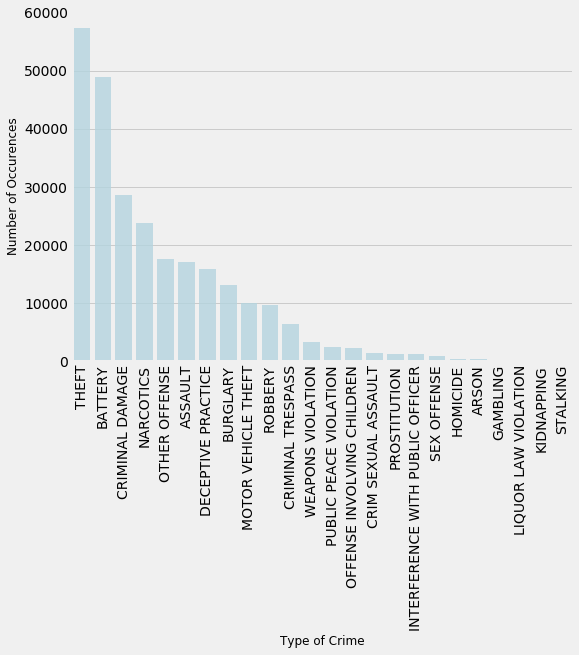

In [16]:
crime_types = crimes['Primary Type'].value_counts().head(24)
plt.figure(figsize=(8,6))
sns.barplot(crime_types.index, crime_types.values, alpha=0.8, color='lightblue')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Type of Crime', fontsize= 12)
plt.xticks(rotation='vertical')
plt.show()

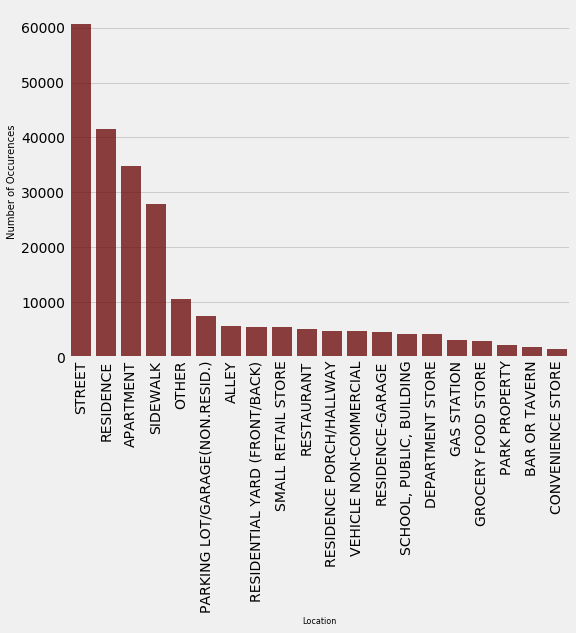

In [17]:
crime_locations = crimes['Location Description'].value_counts().head(20)
plt.figure(figsize=(8,6))
sns.barplot(crime_locations.index, crime_locations.values, alpha=0.8, color='maroon')
plt.ylabel('Number of Occurences', fontsize=10)
plt.xlabel('Location', fontsize= 8)
plt.xticks(rotation='vertical')
plt.show()

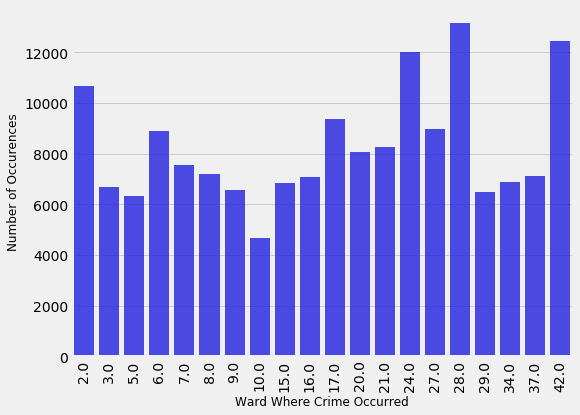

In [18]:
crime_wards = crimes['Ward'].value_counts().head(20)
plt.figure(figsize=(8,6))
sns.barplot(crime_wards.index, crime_wards.values, alpha=0.8, color='blue')
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('Ward Where Crime Occurred', fontsize= 12)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
crimes['Arrest'].value_counts()

False    194007
True      69769
Name: Arrest, dtype: int64

In [20]:
crimes.groupby('Arrest')['Primary Type'].value_counts()

Arrest  Primary Type                     
False   THEFT                                50576
        BATTERY                              37360
        CRIMINAL DAMAGE                      26840
        DECEPTIVE PRACTICE                   14861
        ASSAULT                              12985
        OTHER OFFENSE                        12754
        BURGLARY                             12468
        MOTOR VEHICLE THEFT                   9073
        ROBBERY                               8719
        CRIMINAL TRESPASS                     2005
        OFFENSE INVOLVING CHILDREN            1913
        CRIM SEXUAL ASSAULT                   1232
        SEX OFFENSE                            757
        WEAPONS VIOLATION                      683
        PUBLIC PEACE VIOLATION                 541
        ARSON                                  402
        HOMICIDE                               319
        KIDNAPPING                             175
        STALKING                        

In [26]:
twentyeight_ward = crimes.loc[:, 'Ward'] == 28.0
crimes.loc[twentyeight_ward, 'Primary Type'].value_counts()

NARCOTICS                            3659
BATTERY                              2579
THEFT                                1287
CRIMINAL DAMAGE                      1008
ASSAULT                               844
OTHER OFFENSE                         723
ROBBERY                               585
DECEPTIVE PRACTICE                    396
MOTOR VEHICLE THEFT                   389
PROSTITUTION                          357
BURGLARY                              297
CRIMINAL TRESPASS                     251
WEAPONS VIOLATION                     205
PUBLIC PEACE VIOLATION                160
INTERFERENCE WITH PUBLIC OFFICER      133
OFFENSE INVOLVING CHILDREN             89
CRIM SEXUAL ASSAULT                    67
GAMBLING                               40
HOMICIDE                               36
SEX OFFENSE                            25
ARSON                                  11
STALKING                                5
CONCEALED CARRY LICENSE VIOLATION       5
LIQUOR LAW VIOLATION              

In [25]:
fortysecond_ward = crimes.loc[:, 'Ward'] == 42.0
crimes.loc[fortysecond_ward, 'Primary Type'].value_counts()

THEFT                                6528
DECEPTIVE PRACTICE                   1746
BATTERY                              1238
CRIMINAL DAMAGE                       543
ASSAULT                               434
CRIMINAL TRESPASS                     433
OTHER OFFENSE                         365
ROBBERY                               280
NARCOTICS                             195
BURGLARY                              182
MOTOR VEHICLE THEFT                   138
PUBLIC PEACE VIOLATION                 86
PROSTITUTION                           84
CRIM SEXUAL ASSAULT                    52
SEX OFFENSE                            29
LIQUOR LAW VIOLATION                   28
OFFENSE INVOLVING CHILDREN             20
WEAPONS VIOLATION                      17
INTERFERENCE WITH PUBLIC OFFICER       15
INTIMIDATION                            8
ARSON                                   8
STALKING                                7
KIDNAPPING                              4
NON-CRIMINAL                      

In [24]:
twentyfourth_ward = crimes.loc[:, 'Ward'] == 24.0
crimes.loc[twentyfourth_ward, 'Primary Type'].value_counts()

NARCOTICS                            3021
BATTERY                              2428
THEFT                                1159
CRIMINAL DAMAGE                      1113
ASSAULT                               746
OTHER OFFENSE                         690
ROBBERY                               597
DECEPTIVE PRACTICE                    379
BURGLARY                              373
MOTOR VEHICLE THEFT                   340
CRIMINAL TRESPASS                     292
WEAPONS VIOLATION                     207
PROSTITUTION                          175
PUBLIC PEACE VIOLATION                140
OFFENSE INVOLVING CHILDREN             82
INTERFERENCE WITH PUBLIC OFFICER       73
CRIM SEXUAL ASSAULT                    53
SEX OFFENSE                            43
GAMBLING                               37
HOMICIDE                               32
ARSON                                  22
LIQUOR LAW VIOLATION                   10
KIDNAPPING                              6
INTIMIDATION                      

In [23]:
seventeenth_ward = crimes.loc[:, 'Ward'] == 17.0
crimes.loc[seventeenth_ward, 'Primary Type'].value_counts()

BATTERY                              2057
THEFT                                1181
NARCOTICS                            1086
CRIMINAL DAMAGE                      1004
OTHER OFFENSE                         726
ASSAULT                               691
BURGLARY                              621
ROBBERY                               387
DECEPTIVE PRACTICE                    341
MOTOR VEHICLE THEFT                   285
WEAPONS VIOLATION                     246
CRIMINAL TRESPASS                     206
INTERFERENCE WITH PUBLIC OFFICER       99
PROSTITUTION                           97
PUBLIC PEACE VIOLATION                 93
OFFENSE INVOLVING CHILDREN             73
CRIM SEXUAL ASSAULT                    50
GAMBLING                               37
HOMICIDE                               26
SEX OFFENSE                            23
ARSON                                  23
KIDNAPPING                              7
STALKING                                5
LIQUOR LAW VIOLATION              

In [22]:
second_ward = crimes.loc[:, 'Ward'] == 2.0
crimes.loc[second_ward, 'Primary Type'].value_counts()

THEFT                                3492
BATTERY                              1647
DECEPTIVE PRACTICE                    956
CRIMINAL DAMAGE                       930
NARCOTICS                             664
ASSAULT                               656
OTHER OFFENSE                         566
CRIMINAL TRESPASS                     419
ROBBERY                               364
MOTOR VEHICLE THEFT                   311
BURGLARY                              282
PUBLIC PEACE VIOLATION                 86
OFFENSE INVOLVING CHILDREN             62
SEX OFFENSE                            54
WEAPONS VIOLATION                      52
CRIM SEXUAL ASSAULT                    46
INTERFERENCE WITH PUBLIC OFFICER       21
PROSTITUTION                           19
HOMICIDE                               14
LIQUOR LAW VIOLATION                    9
INTIMIDATION                            7
STALKING                                6
ARSON                                   6
GAMBLING                          

In [21]:
crime_wards

28.0    13162
42.0    12446
24.0    12030
2.0     10681
17.0     9377
27.0     8972
6.0      8893
21.0     8249
20.0     8070
7.0      7550
8.0      7186
37.0     7107
16.0     7078
34.0     6864
15.0     6833
3.0      6666
9.0      6556
29.0     6500
5.0      6311
10.0     4656
Name: Ward, dtype: int64